In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data = pd.read_csv('Data/Covid19_Data/us-counties.csv')
data.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [46]:
ny_df = data.loc[data['state'] == 'New York']
ny_df.head(5)

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0


In [47]:
ny_df['county'].unique()

array(['New York City', 'Westchester', 'Nassau', 'Rockland', 'Saratoga',
       'Suffolk', 'Ulster', 'Monroe', 'Albany', 'Delaware', 'Dutchess',
       'Herkimer', 'Orange', 'Schenectady', 'Broome', 'Tioga', 'Tompkins',
       'Erie', 'Greene', 'Montgomery', 'Putnam', 'Allegany', 'Onondaga',
       'Ontario', 'Clinton', 'Rensselaer', 'Sullivan', 'Wyoming',
       'Chenango', 'Essex', 'Hamilton', 'Jefferson', 'Livingston',
       'Warren', 'Washington', 'Schoharie', 'Wayne', 'Columbia', 'Fulton',
       'Genesee', 'Niagara', 'Oneida', 'Steuben', 'Cortland', 'Madison',
       'St. Lawrence', 'Cayuga', 'Oswego', 'Otsego', 'Chemung', 'Orleans',
       'Chautauqua', 'Franklin', 'Cattaraugus', 'Schuyler', 'Lewis',
       'Unknown', 'Seneca', 'Yates'], dtype=object)

In [48]:
nyc_df = ny_df.loc[ny_df['county'] == "New York City"]
ny_df.head(5)

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0


In [49]:
len(nyc_df)

259

In [50]:
nyc_df["date"] = pd.to_datetime(nyc_df["date"])

In [51]:
nyc_df['case_lagged'] = nyc_df.groupby(['state'])['cases'].shift(1)
nyc_df['net_case'] = abs(nyc_df["case_lagged"] - nyc_df["cases"])
nyc_df.head(10)

,date,county,state,fips,cases,deaths,case_lagged,net_case
416,2020-03-01,New York City,New York,NaN,1,0,NaN,NaN
448,2020-03-02,New York City,New York,NaN,1,0,1.0,0.0
482,2020-03-03,New York City,New York,NaN,2,0,1.0,1.0
518,2020-03-04,New York City,New York,NaN,2,0,2.0,0.0
565,2020-03-05,New York City,New York,NaN,4,0,2.0,2.0
627,2020-03-06,New York City,New York,NaN,5,0,4.0,1.0
715,2020-03-07,New York City,New York,NaN,12,0,5.0,7.0
820,2020-03-08,New York City,New York,NaN,14,0,12.0,2.0
947,2020-03-09,New York City,New York,NaN,20,0,14.0,6.0
1098,2020-03-10,New York City,New York,NaN,37,0,20.0,17.0


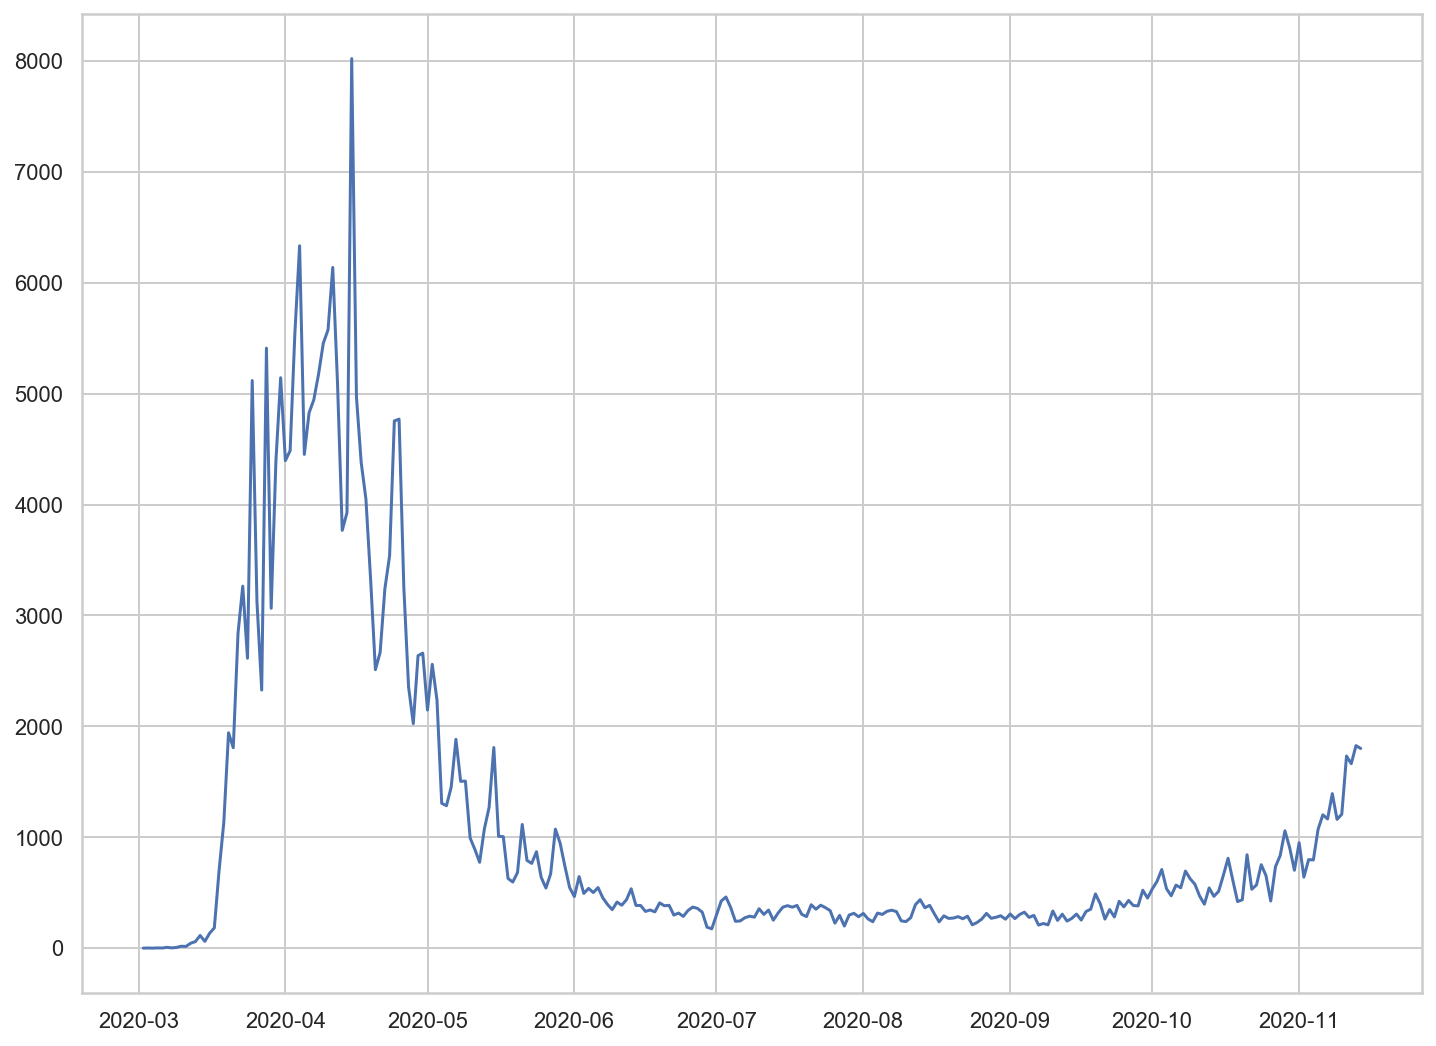

In [53]:
plt.figure(figsize=(12,9))
plt.plot(nyc_df["date"], nyc_df['net_case'])
plt.show()

### different dataset from nychealth

In [55]:
data = pd.read_csv('Data/Covid19_Data/data-by-day.csv')
data.head(10)

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,03/05/2020,3,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,03/06/2020,8,5,0,0,3,2,0,2,1,...,1,1,0,1,1,0,0,0,0,0
7,03/07/2020,7,6,0,0,3,3,0,0,1,...,1,1,0,1,0,0,0,0,0,0
8,03/08/2020,21,15,0,0,6,5,0,3,2,...,2,2,0,1,0,0,0,0,0,0
9,03/09/2020,57,30,0,0,15,10,0,4,6,...,3,2,0,3,1,0,1,0,0,0


In [56]:
data['date_of_interest'] = pd.to_datetime(data['date_of_interest'])
data.head(5)

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,2020-02-29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


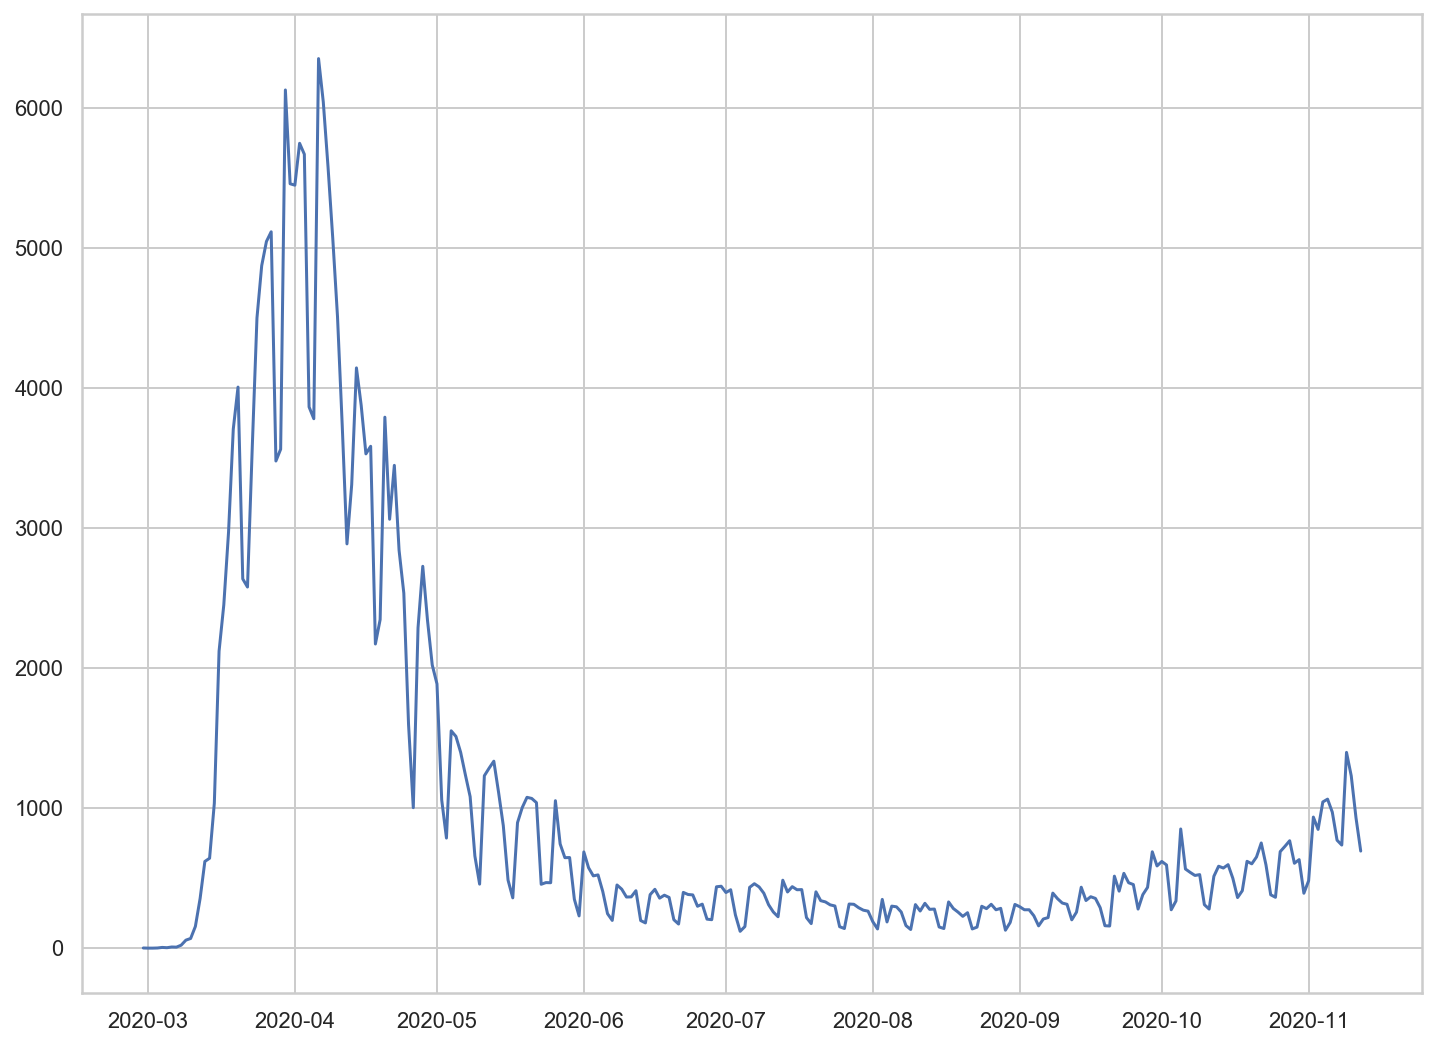

In [58]:
plt.figure(figsize=(12,9))
plt.plot(data['date_of_interest'][:365], data['CASE_COUNT'][:365])
plt.show()